# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df.info()
start = df.shape[0]
start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

23699

 Изначально наши данные были склеены '\t', во время открытия нашего файла мы применили параметр sep, который помог разделить наши данные по столбцам

## Построим гистограммы по всем столбцам

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

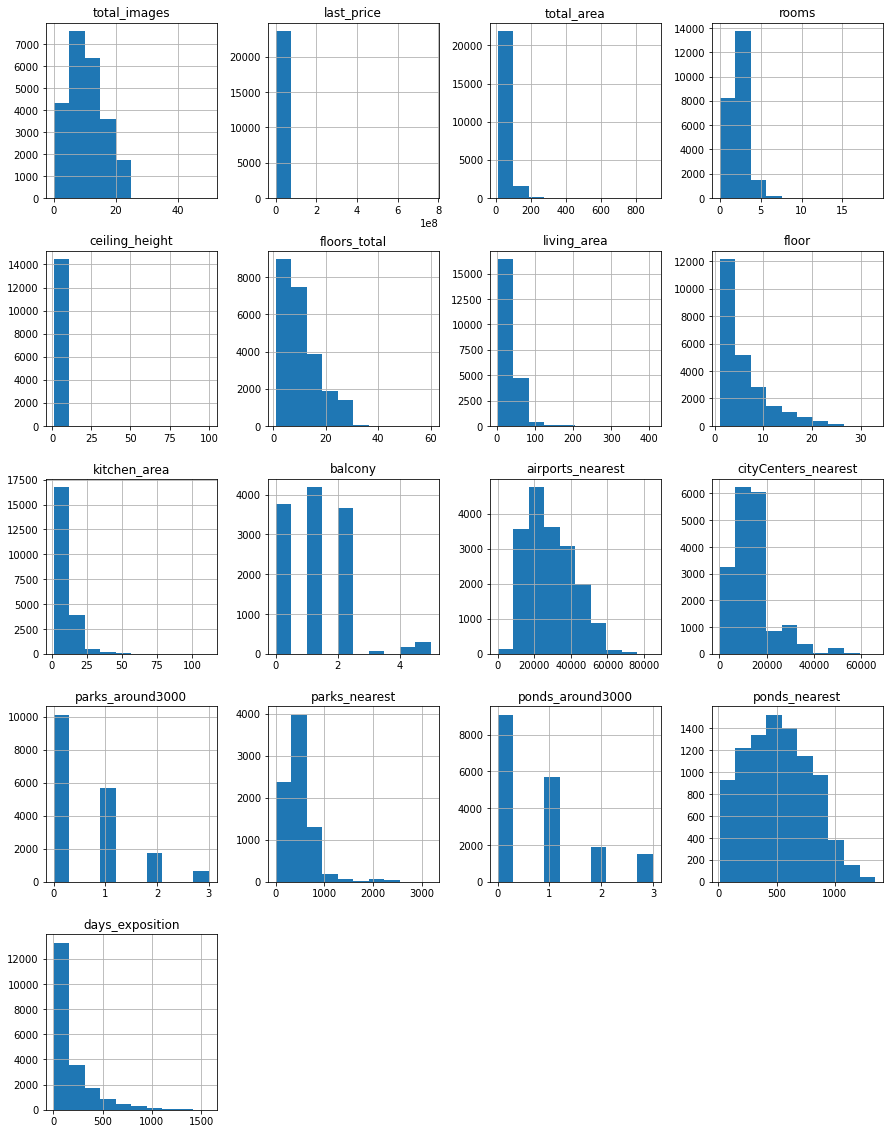

In [3]:
df.hist(figsize=(15,20))


1. total_images:
 - Большинство объявлений содержат меньше 20 изображений, но есть небольшое количество объявлений, где количество изображений превышает 40

2. last_price:
 -  Большинство объектов стоит менее 15 млн. рублей, но есть выбросы с очень высокой стоимостью

3. total_area:
 - Большинство объектов имеет площадь меньше 200 кв.м. Есть несколько выбросов с площадью, превышающей 500 кв.м, что, скорее всего, относятся к большим домам

4. rooms:
 - Количество комнат в большинстве объектов — 1-4 комнаты, что типично для обычных квартир. Выбросы наблюдаются с количеством комнат больше 6

5. ceiling_height:
 - Основное распределение высоты потолков находится в диапазоне от 2 до 4 метров, что является стандартом для жилых квартир. Есть выбросы с высотой более 25 метров

6. floors_total:
 - Большинство домов имеет до 25 этажей, что типично для многоэтажных жилых домов. Однако есть небольшое количество зданий с более чем 40 этажами

7. living_area:
 - Жилая площадь большинства объектов сосредоточена до 130 кв.м. Есть выбросы в районе 300 кв.м

8. floor:
 - Большинство квартир расположены на 1-10 этажах. Объекты на высоких этажах встречаются реже, но они есть

9. kitchen_area:
 - Основное количество кухонь имеет площадь до 40 кв.м, но есть объекты с кухнями более 50 кв.м, что также может быть выбросом

10. balcony:
 - Большинство объектов имеют 1-2 балконов,либо вообще не имеют, и небольшая часть — 3 или более балконов

11. airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest:
 - Есть объекты, расположенные очень далеко и это может влиять на их стоимость

12. days_exposition:
 - Большинство объектов продается в течение до 500 дней, однако есть редкие объявления, которые находятся на продаже более 1000 дней. Это иожет быть аномалией

13. parks_around3000, ponds_around3000:
- У большинства продаваемых квартир нет парков или водоемов в районе 3км


### Выполним предобработку данных

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype('bool')

df['is_apartment'] = df['is_apartment'].fillna(False)



Логично будет заполнить пропущенные значения в столбцах **balcony** и **is_apartment**, так как продавец мог не указать количество балконов из-за их отсутствия, а также оставить второй столбец без заполнения, если это не апартаменты.


В остальных столбцах продавец либо забыл указать, либо не было информации, тем не менее заполнять эти данные медианным значением или удалять не стоит, потому что это важные характеристики, которые понадобятся в будущем



   В данных все еще много пропусков:
1. В столбце floors_total мало пропусков - мы можем сразу удалить их без потери качества данных, аналогичным образом мы можем поступить со столбцом locality name
2.  По столбцу `living_area` - иногда продавцы могут не указывать данное значение, однако, мы можем попробовать его вычислить. Мы можем использовать метод медианного коэффициента, чтобы избежать этого - для этого мы можем найти **соотношение медианной общей площади к медианной жилой**. А затем, заполнить пропуски в столбце `living_area` **отношением общей площади к найденному соотношению**.Со столбцом `kitchen_area` можно поступить так же, как со столбцом `living_area`.
3. Пропуски в столбце ceiling_height можно заполнить медианой



In [6]:
df = df.dropna(subset=['floors_total', 'locality_name'])

median_total_area = df['total_area'].median()
median_living_area = df['living_area'].median()
living_area_ratio = median_total_area / median_living_area

df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] / living_area_ratio

median_kitchen_area = df['kitchen_area'].median()
kitchen_area_ratio = median_total_area / median_kitchen_area

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] / kitchen_area_ratio

median_ceiling_height = df['ceiling_height'].median()
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = median_ceiling_height


In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [9]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], errors='coerce')
df['balcony'] = df['balcony'].astype('Int64')
df['floors_total'] = df['floors_total'].astype('Int64')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['days_exposition'] = df['days_exposition'].round().astype('Int64')


Мы изменили тип данных в некоторых столбцах, таких как:**first_day_exposition, balcony, floors_total, parks_around3000, ponds_around3000, days_exposition**

**first_day_exposition** - Тип данных изменен с object на datetime, по причине того, что данные содержались в виде строк и будет уместно преобразовать их в формат **datetime**

**balcony** - Количество балконов должно быть целым числом, так как нельзя иметь «полу-балкон», именно поэтому мы заменили float64 на int64

**floors_total** - Общее количество этажей всегда должно быть целым числом, так как здания не могут иметь дробные этажи

**parks_around3000** - Столбец показывает количество парков в радиусе 3000 метров, и это всегда должно быть целым числом (нельзя иметь дробные парки)

**ponds_around3000** - Столбец показывает количество прудов в радиусе 3000 метров, и это тоже должно быть целым числом (нельзя иметь дробные пруды)

**days_exposition** - Это столбец, представляющий количество дней, в течение которых объект находился на рынке, логично это должно быть целым числом



## Избавление от неявных дубликатов


In [10]:

df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', "городской поселок", "городской"], 'поселок', regex=True) 
    .str.strip()
)



<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**


   Хорошая работа. Также рекомендую хорошую статью по предобработке, в ней есть интересные способы обработки неявных дубликатов: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27 В пункте 8 есть интересная информация о работе с опечатками в названиях населенных пунктов

</div>


### Добавим в таблицу новые столбцы

In [11]:
df['price_per_sqm'] = (df['last_price'] / df['total_area']).round(2)

df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

df['month_exposition'] = df['first_day_exposition'].dt.month

df['year_exposition'] = df['first_day_exposition'].dt.year

df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)


In [12]:
# функция для определения типа этажа
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [13]:
#Применение функции к новому столбцу
df['floor_type'] = df.apply(floor_type, axis=1)

In [14]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,<NA>,120370.37,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,True,...,NaN,0,NaN,81,82920.79,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,True,...,90.0,2,574.0,558,92785.71,3,8,2015,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,91.730769,9,True,...,84.0,3,234.0,424,408176.10,4,7,2015,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121,100000.00,1,6,2018,8.0,другой


### Проведем исследовательский анализ данных

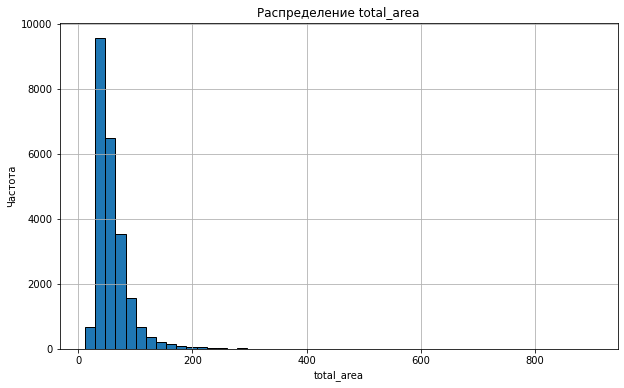

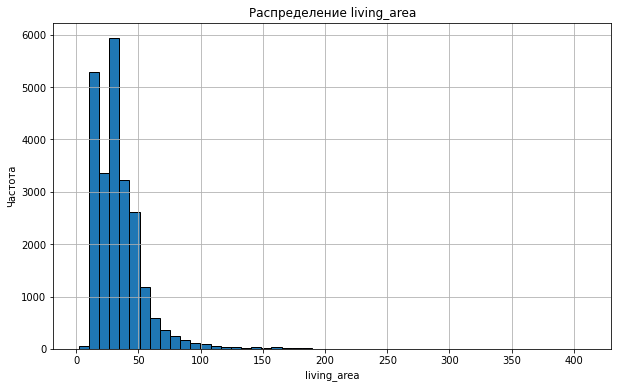

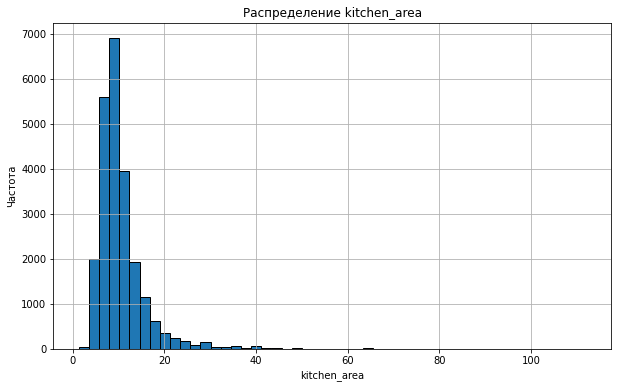

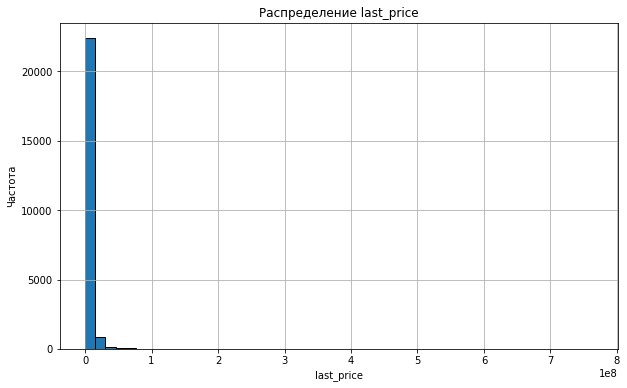

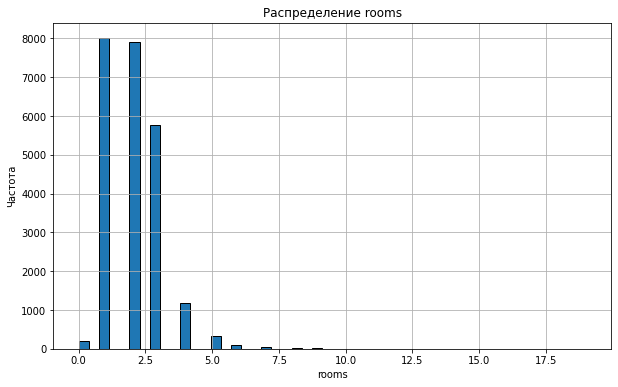

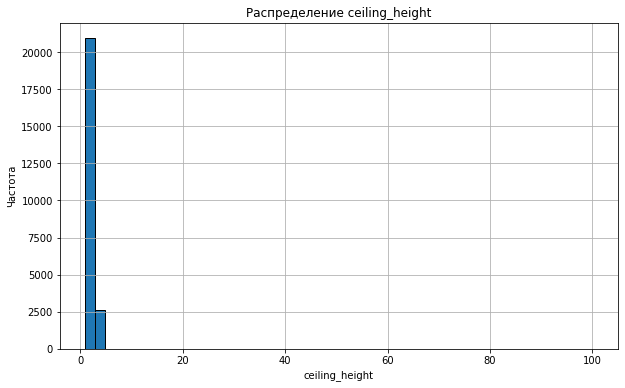

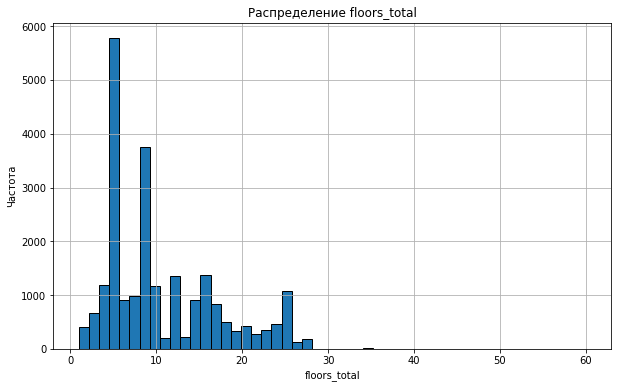

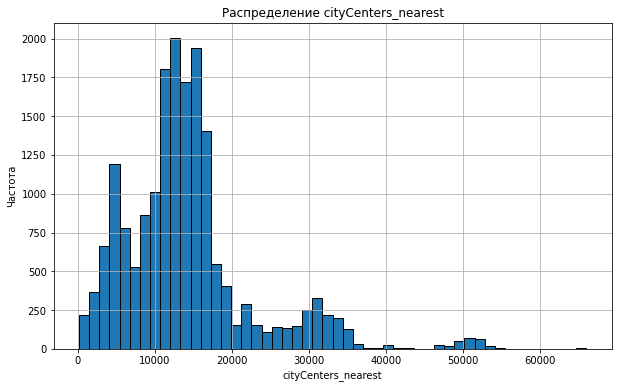

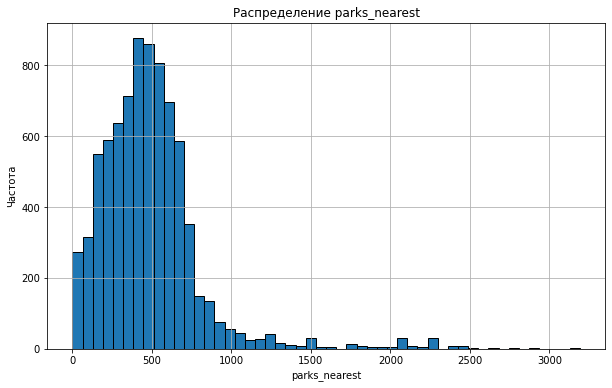

In [15]:
parameters = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',
              'floors_total', 'cityCenters_nearest', 'parks_nearest']


for param in parameters:
    plt.figure(figsize=(10, 6))
    df[param].plot(kind='hist', bins=50, edgecolor='black')
    plt.title(f'Распределение {param}')
    plt.xlabel(f'{param}')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()



In [16]:
# Исправляем значения высоты потолков 
df.loc[df['ceiling_height'] > 20, 'ceiling_height'] = df['ceiling_height'] / 10

total_area

Диапазон: Основное распределение находится в пределах от 30 до 150 кв.м., что является стандартным для квартир.

Выбросы: Присутствуют единичные случаи с площадью свыше 200 кв.м., что может соответствовать большим квартирам или домам.


living_area

Диапазон: Большинство значений находятся в диапазоне от 15 до 120 кв.м.

Выбросы: Выбросы с жилой площадью более 130 кв.м. могут указывать на крупные объекты или ошибочные данные.


kitchen_area

Диапазон: Наиболее типичные значения лежат в пределах от 5 до 40 кв.м.

Выбросы: Кухни площадью свыше 50 кв.м. редки и могут быть свойственны лишь просторным домам или апартаментам высокого класса.


last_price

Диапазон: Цены варьируются, с множеством квартир стоимостью от 2 до 10 млн.

Выбросы: Очень высокие цены, возможно, относятся к роскошной недвижимости или особым объектам, таким как коттеджи или виллы.


rooms

Диапазон: Большинство квартир имеют от 1 до 3 комнат.

Выбросы: Наличие квартир с более чем 6 комнатами может указывать на многоуровневые квартиры или небольшие дома.


ceiling_height

Диапазон: Стандартная высота потолков колеблется между 2.5 м и 3.5 м.

Выбросы: Очень высокие потолки более 4 метров необычны для стандартной застройки и могут быть в старинных или элитных домах.


floors_total

Диапазон: Большинство домов имеют от 5 до 25 этажей.

Выбросы: Очень высокие здания более 25 этажей могут быть характерны для деловых районов или новых жилых комплексов.


cityCenters_nearest

Диапазон: Обычное расстояние до центра варьируется от 2 до 40 км.

Выбросы: Расстояния менее 1 км или более 40 км могут указывать на особые условия расположения объекта.


parks_nearest

Диапазон: Встречаются значения от 100 до 2500 м.

Выбросы: Расстояния свыше 3000 м могут означать, что объект находится в районе с ограниченным доступом к зеленым зонам.

In [18]:
df_filtered = df[
    ((df['total_area'] <= 200) | df['total_area'].isna()) &
    ((df['living_area'] <= 120) | df['living_area'].isna()) &
    ((df['kitchen_area'] <= 40) | df['kitchen_area'].isna()) &
    ((df['last_price'] <= 13000000) | df['last_price'].isna()) &
    ((df['rooms'] > 0) & (df['rooms'] <= 5) | df['rooms'].isna()) &
    ((df['ceiling_height'] >= 2.0) & (df['ceiling_height'] <= 4.0) | df['ceiling_height'].isna()) &
    ((df['floors_total'] <= 28) | df['floors_total'].isna()) &
    ((df['cityCenters_nearest'] <= 40000) | df['cityCenters_nearest'].isna()) &
    ((df['parks_nearest'] <= 2500) | df['parks_nearest'].isna())
]

filtered = df_filtered.shape[0]

remaining_data_ratio = filtered / start * 100

print(f'Процент от изначального числа данных:{remaining_data_ratio}')


Процент от изначального числа данных:90.02489556521373


Немного поменял условия фильтрации и вычислил процент оставшегося количества данных

total_area

Диапазон: Основное распределение находится в пределах от 30 до 200 кв.м., что является стандартным для квартир.

Выбросы: Присутствуют единичные случаи с площадью свыше 200 кв.м., что может соответствовать большим квартирам или домам.


living_area

Диапазон: Большинство значений находятся в диапазоне от 15 до 120 кв.м.

Выбросы: Выбросы с жилой площадью более 130 кв.м. могут указывать на крупные объекты или ошибочные данные.


kitchen_area

Диапазон: Наиболее типичные значения лежат в пределах от 5 до 40 кв.м.

Выбросы: Кухни площадью свыше 50 кв.м. редки и могут быть свойственны лишь просторным домам или апартаментам высокого класса.


last_price

Диапазон: Цены варьируются, с множеством квартир стоимостью от 2 до 10 млн.

Выбросы: Очень высокие цены, возможно, относятся к роскошной недвижимости или особым объектам, таким как коттеджи или виллы.


rooms

Диапазон: Большинство квартир имеют от 1 до 5 комнат.

Выбросы: Наличие квартир с более чем 6 комнатами может указывать на многоуровневые квартиры или небольшие дома.


ceiling_height

Диапазон: Стандартная высота потолков колеблется между 2.5 м и 3.5 м.

Выбросы: Очень высокие потолки более 4 метров необычны для стандартной застройки и могут быть в старинных или элитных домах.


floors_total

Диапазон: Большинство домов имеют от 5 до 25 этажей.

Выбросы: Очень высокие здания более 25 этажей могут быть характерны для деловых районов или новых жилых комплексов.


cityCenters_nearest

Диапазон: Обычное расстояние до центра варьируется от 2 до 40 км.

Выбросы: Расстояния менее 1 км или более 40 км могут указывать на особые условия расположения объекта.


parks_nearest

Диапазон: Встречаются значения от 100 до 2500 м.

Выбросы: Расстояния свыше 3000 м могут означать, что объект находится в районе с ограниченным доступом к зеленым зонам.

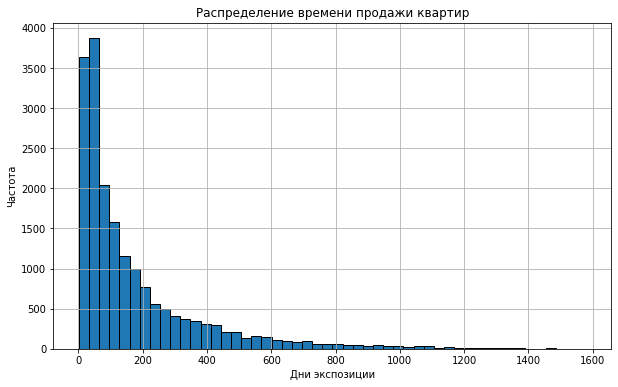

(174.50837301374995, 92.0)

In [20]:
plt.figure(figsize=(10, 6))
df_filtered['days_exposition'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Распределение времени продажи квартир')
plt.xlabel('Дни экспозиции')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

mean_days = df_filtered['days_exposition'].mean()
median_days = df_filtered['days_exposition'].median()

mean_days, median_days


Большинство квартир продаются в среднем за 103 дня (медиана). Продажи, которые занимают более 300 дней, являются долгими, а продажи за менее чем 100 дней можно считать быстрыми.

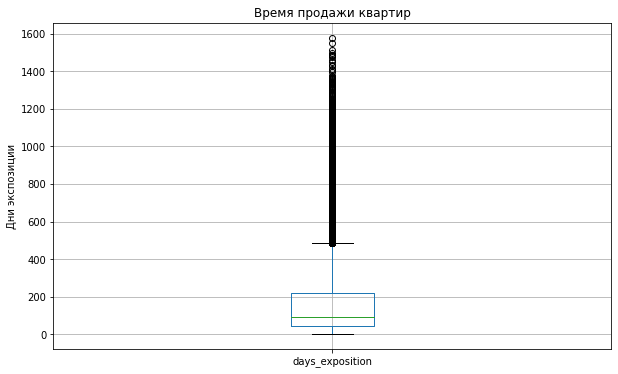

Первый квартиль:44.0
Третий квартиль:221.0
Среднее:174.50837301374995
Медиана:92.0


In [22]:
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='days_exposition')
plt.title('Время продажи квартир')
plt.ylabel('Дни экспозиции')
plt.grid(True)
plt.show()

# Найдем 1-й и 3-й квартили
q1 = df_filtered['days_exposition'].quantile(0.25)
q3 = df_filtered['days_exposition'].quantile(0.75)

q1, q3

mean_days = df_filtered['days_exposition'].mean()
median_days = df_filtered['days_exposition'].median()

print(f'Первый квартиль:{q1}')
print(f'Третий квартиль:{q3}')
print(f'Среднее:{mean_days}')
print(f'Медиана:{median_days}')

Среднее время продажи составляет примерно 174 дня. Это значение находится между первым и третьим квартилями, но ближе к третьему квартилю, что говорит о наличии нескольких квартир с очень долгим временем продажи.Скорее всего среднее отреагировало на выбросы и 'вытянулось' вверх

Медиана показывает, что 50% квартир продавались за 92 дня или меньше. Медиана меньше среднего значения, что указывает на наличие значительного количества квартир, которые продаются быстрее, чем за среднее время. Однако это также означает, что есть некоторые квартиры, которые продаются очень долго, и они поднимают среднее значение.

# Вывод

Быстрые продажи (до 44-92 дней) — это квартиры, которые быстро находят покупателя.
Продажи, которые занимают более 221 дня, можно считать долгими или имеющими сложности с реализацией.
Среднее значение указывает на наличие некоторых объектов, которые продаются очень долго, и это поднимает общее среднее время продажи.

              total_area  living_area  kitchen_area     rooms  last_price
total_area      1.000000     0.919128      0.499064  0.800457    0.719004
living_area     0.919128     1.000000      0.240297  0.884550    0.606363
kitchen_area    0.499064     0.240297      1.000000  0.129710    0.527418
rooms           0.800457     0.884550      0.129710  1.000000    0.462450
last_price      0.719004     0.606363      0.527418  0.462450    1.000000


<Figure size 720x432 with 0 Axes>

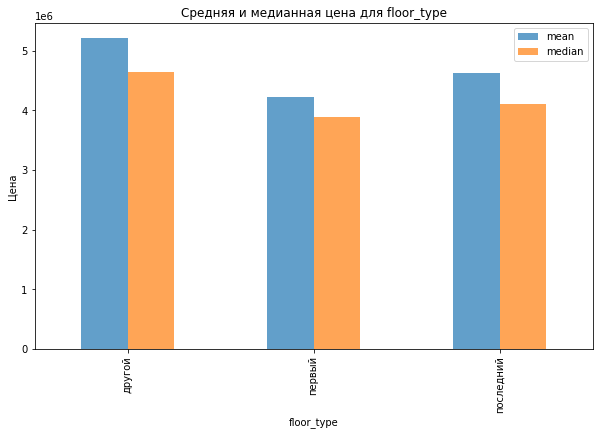

<Figure size 720x432 with 0 Axes>

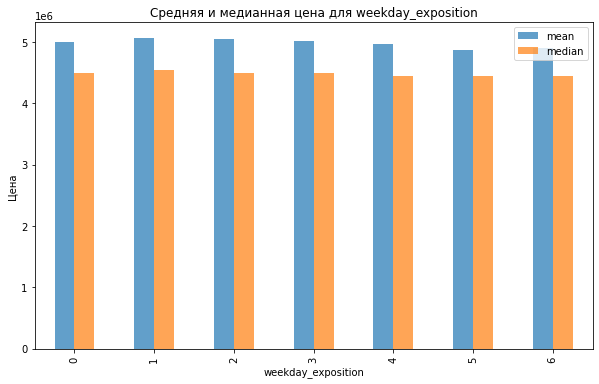

<Figure size 720x432 with 0 Axes>

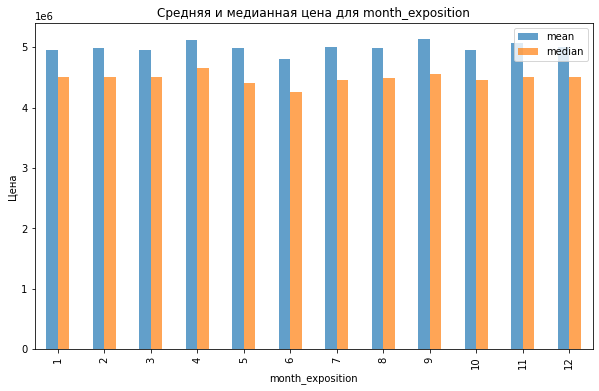

<Figure size 720x432 with 0 Axes>

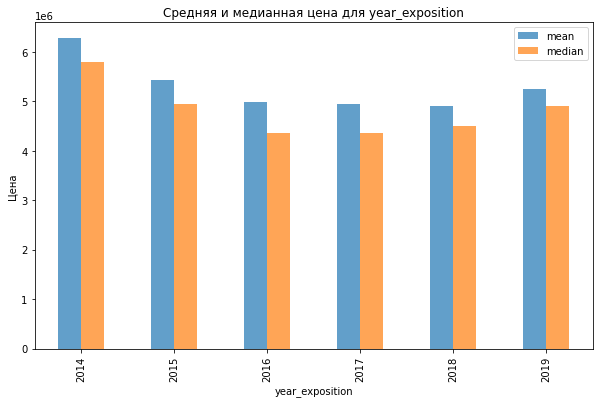

In [24]:
linear =['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']

corr_matrix = df_filtered[linear].corr()

non_linear = ['floor_type', 'weekday_exposition', 'month_exposition', 'year_exposition']

print(corr_matrix)

for col in non_linear:
    df_grouped = df_filtered.groupby(col)['last_price'].agg(['mean', 'median']).reset_index()

    # Построение бар-графика для средней и медианной цены
    plt.figure(figsize=(10, 6))
    df_grouped.plot(x=col, y=['mean', 'median'], kind='bar', alpha=0.7, figsize=(10, 6))
    plt.title(f'Средняя и медианная цена для {col}')
    plt.xlabel(col)
    plt.ylabel('Цена')
    plt.grid(False)
    plt.show()



## Линейные
 - Наибольшее влияние на цену оказывают общая площадь **(0.72)** и жилая площадь **(0.60)**.
 - Количество комнат **(0.46)** и площадь кухни **(0.52)** также влияют на цену, но не так сильно, как общая площадь.

## Нелинейные
 - Тип этажа влияет на стоимость, причём квартиры на среднем этаже имеют наибольшую цену.
 - День недели и месяц размещения объявления не оказывают значительного влияния на цену квартиры.
 - Экономические факторы (год размещения) могут оказывать влияние на цену недвижимости, и наблюдается снижение цен в период с 2014 по 2017 год с последующей стабилизацией.
 

In [25]:

mean_per_sqm = df_filtered.pivot_table(index='locality_name', 
                             values=['price_per_sqm', 'total_area'], 
                             aggfunc={'price_per_sqm': 'mean', 'total_area': 'count'}).reset_index()

mean_per_sqm.columns = ['locality_name', 'average_price', 'total_listings']

top_10 = mean_per_sqm.sort_values(by='total_listings', ascending=False).head(10)

most_expensive = top_10.loc[top_10['average_price'].idxmax()]
least_expensive = top_10.loc[top_10['average_price'].idxmin()]

print(most_expensive)
print()
print(least_expensive)

locality_name     Санкт-Петербург
average_price       106138.697581
total_listings              13873
Name: 32, dtype: object

locality_name           Выборг
average_price     57883.768979
total_listings             235
Name: 4, dtype: object


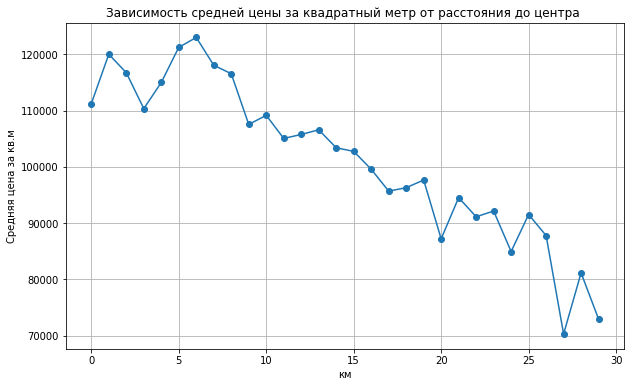

In [26]:
spb = df_filtered[df_filtered['locality_name'] == 'Санкт-Петербург']

spb['cityCenters_nearest_km'].round()

price = spb.pivot_table(index='cityCenters_nearest_km', values='price_per_sqm', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 6))
plt.plot(price['cityCenters_nearest_km'], price['price_per_sqm'], marker='o')
plt.title('Зависимость средней цены за квадратный метр от расстояния до центра ')
plt.xlabel('км')
plt.ylabel('Средняя цена за кв.м')
plt.grid(True)
plt.show()



Чем дальше квартира находится от центра, тем ниже стоимость квадратного метра. Это подтверждается постепенным снижением средней цены после 10-12 километров от центра.

Однако, есть определённые колебания цен в пределах первых нескольких километров от центра, что может свидетельствовать о наличии престижных районов на разных расстояниях.

# Вывод

## Предобработка данных

Перед началом анализа были проведены важные шаги по предобработке данных:

 - Обработка пропущенных значений
 - Преобразование типов данных
 - Создание новых переменных
 - Удаление выбросов

Далее мы добавили новые параметры, которые помогли нам в будущем для анализа:

 - цена одного квадратного метра(price_per_sqm)
 - день недели публикации объявления (weekday_exposition)
 - месяц публикации объявления (month_exposition)
 - год публикации объявления (year_exposition)
 - тип этажа квартиры (floor_type)
 - расстояние до центра города в километрах (cityCenters_nearest_km)

## Исследовательский анализ данных

- В ходе исследовательского анализа данных были обработаны аномалии и восстановлены данные в таких столбцах: **total_area, living_area, kitchen_area, last_price, rooms, ceiling_height, floors_total, cityCenters_nearest, parks_nearest**


 - Также мы изучили продолжительность продаж квартир и пришли к выводу, что в среднем квартиры продаются 174 дня, больше 221 дней считаются долгими, а меньше 92-быстрыми


 - Больше всего на общую стоимость объекта влияет количество комнат, общая и жилая площадь, а наименее влиятельными являются дни, недели и годы выставления
 
 
 - **Санкт-Петербург** очевидно является самым дорогим населенным пунктом в плане стоимости квадратного метра(106104р), а самым дешевым является-**Выборг**(57883р)
 
 
 - Зависимость цены от расстояния до центра показала, что чем дальше от центра города находится квартира, тем дешевле она становится.Пики стоимости наблюдаются в пределах 1-5 км от центра, что вероятно связано с престижностью районов, близких к центру. После 10 км цена начинает постепенно снижаться.
 
## Рекомендации 

Для покупателей, которые хотят сэкономить, но не потерять в качестве, стоит рассмотреть варианты на расстоянии 10-15 км от центра города, где цена значительно ниже, но доступ к инфраструктуре всё ещё удобен.

## Заключение 

Анализ показал, что цена объекта недвижимости зависит от множества факторов, но наиболее значимыми являются общая и жилая площади, количество комнат, а также близость к центру города.